<a href="https://colab.research.google.com/github/SherylPhilip/The-Sparks-Foundation-Internship/blob/main/Task_4_Terrorism_(EDA)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The Sparks Foundation

# Data Science and Business Analytics Intern (GRIPJUNE21) 

# **Exploratory Data Analysis - Terrorism(TASK 4)**

**Author : Sheryl Philip**

● Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’.

● As a security/defense analyst, try to find out the hot zone of terrorism.

● What all security issues and insights you can derive by EDA?

Dataset: https://bit.ly/2TK5Xn5

**Importing The Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

**Importing the Dataset by the CSV File**


In [2]:
df = pd.read_csv(r'/content/drive/MyDrive/Python files/globalterrorismdb_0718dist.csv', encoding= 'ISO-8859-1', low_memory= False)
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


# **Pre - Processing the Data**

In [3]:
df.shape

(181691, 135)

In [4]:
df.info

<bound method DataFrame.info of              eventid  iyear  imonth  iday  ... INT_IDEO  INT_MISC INT_ANY  related
0       197000000001   1970       7     2  ...        0         0       0      NaN
1       197000000002   1970       0     0  ...        1         1       1      NaN
2       197001000001   1970       1     0  ...       -9         1       1      NaN
3       197001000002   1970       1     0  ...       -9         1       1      NaN
4       197001000003   1970       1     0  ...       -9         1       1      NaN
...              ...    ...     ...   ...  ...      ...       ...     ...      ...
181686  201712310022   2017      12    31  ...        0         0       0      NaN
181687  201712310029   2017      12    31  ...       -9         1       1      NaN
181688  201712310030   2017      12    31  ...        0         0       0      NaN
181689  201712310031   2017      12    31  ...       -9         0      -9      NaN
181690  201712310032   2017      12    31  ...       -9

In [5]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

In [6]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

**Number of unique values in each column**

In [7]:
for i in df.columns:
    print(i,len(df[i].unique()))

eventid 181691
iyear 47
imonth 13
iday 32
approxdate 2245
extended 2
resolution 1860
country 205
country_txt 205
region 12
region_txt 12
provstate 2856
city 36675
latitude 48323
longitude 48040
specificity 6
vicinity 3
location 44110
summary 112493
crit1 2
crit2 2
crit3 2
doubtterr 4
alternative 6
alternative_txt 6
multiple 3
success 2
suicide 2
attacktype1 9
attacktype1_txt 9
attacktype2 10
attacktype2_txt 10
attacktype3 9
attacktype3_txt 9
targtype1 22
targtype1_txt 22
targsubtype1 113
targsubtype1_txt 113
corp1 33239
target1 86007
natlty1 216
natlty1_txt 216
targtype2 23
targtype2_txt 23
targsubtype2 108
targsubtype2_txt 108
corp2 2692
target2 5044
natlty2 159
natlty2_txt 159
targtype3 21
targtype3_txt 21
targsubtype3 93
targsubtype3_txt 93
corp3 423
target3 721
natlty3 111
natlty3_txt 111
gname 3537
gsubname 1184
gname2 434
gsubname2 61
gname3 117
gsubname3 15
motive 14491
guncertain1 3
guncertain2 3
guncertain3 3
individual 2
nperps 114
nperpcap 51
claimed 4
claimmode 11
claimmode

**To check is there are some missing values**

In [8]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [9]:
# Checking for duplicate values
df.duplicated().sum()

0

# **Cleaning Data**

In [10]:
#Since there are 135 Columns. We will take only those columns which will help in our Analysis
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','extended':'Duration','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','natlty1_txt':'Nationality',
                        'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','latitude': 'lat',
                       'longitude':'long','weaptype1_txt':'Weapon_type','motive':'Motive','ishostkid':'Host'},inplace=True)
df.columns

Index(['eventid', 'Year', 'Month', 'Day', 'approxdate', 'Duration',
       'resolution', 'country', 'Country', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [11]:
df = df[['Year','Month','Day','Duration','Country','Region','city','lat','long','success','suicide','AttackType','Target','Nationality','Group','Motive','Weapon_type','Killed','Wounded','Summary','Target_type','Host']]
df['Casualties']= df['Killed'] + df['Wounded']
df.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Month,Day,Duration,Country,Region,city,lat,long,success,suicide,AttackType,Target,Nationality,Group,Motive,Weapon_type,Killed,Wounded,Summary,Target_type,Host,Casualties
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,1,0,Assassination,Julio Guzman,Dominican Republic,MANO-D,NaN,Unknown,1.0,0.0,NaN,Private Citizens & Property,0.0,1.0
1,1970,0,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,1,0,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",Belgium,23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN,Government (Diplomatic),1.0,0.0
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,1,0,Assassination,Employee,United States,Unknown,NaN,Unknown,1.0,0.0,NaN,Journalists & Media,0.0,1.0
3,1970,1,0,0,Greece,Western Europe,Athens,37.997490,23.762728,1,0,Bombing/Explosion,U.S. Embassy,United States,Unknown,NaN,Explosives,NaN,NaN,NaN,Government (Diplomatic),0.0,NaN
4,1970,1,0,0,Japan,East Asia,Fukouka,33.580412,130.396361,1,0,Facility/Infrastructure Attack,U.S. Consulate,United States,Unknown,NaN,Incendiary,NaN,NaN,NaN,Government (Diplomatic),0.0,NaN


In [12]:
df.tail()

,Year,Month,Day,Duration,Country,Region,city,lat,long,success,suicide,AttackType,Target,Nationality,Group,Motive,Weapon_type,Killed,Wounded,Summary,Target_type,Host,Casualties
181686,2017,12,31,0,Somalia,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,1,0,Armed Assault,Checkpoint,Somalia,Al-Shabaab,NaN,Firearms,1.0,2.0,12/31/2017: Assailants opened fire on a Somali...,Military,0.0,3.0
181687,2017,12,31,0,Syria,Middle East & North Africa,Jableh,35.407278,35.942679,1,0,Bombing/Explosion,Hmeymim Air Base,Russia,Muslim extremists,NaN,Explosives,2.0,7.0,12/31/2017: Assailants launched mortars at the...,Military,0.0,9.0
181688,2017,12,31,0,Philippines,Southeast Asia,Kubentog,6.900742,124.437908,1,0,Facility/Infrastructure Attack,Houses,Philippines,Bangsamoro Islamic Freedom Movement (BIFM),NaN,Incendiary,0.0,0.0,12/31/2017: Assailants set fire to houses in K...,Private Citizens & Property,0.0,0.0
181689,2017,12,31,0,India,South Asia,Imphal,24.798346,93.940430,0,0,Bombing/Explosion,Office,India,Unknown,NaN,Explosives,0.0,0.0,12/31/2017: Assailants threw a grenade at a Fo...,Government (General),0.0,0.0
181690,2017,12,31,0,Philippines,Southeast Asia,Cotabato City,7.209594,124.241966,0,0,Bombing/Explosion,Unknown,Philippines,Unknown,NaN,Explosives,0.0,0.0,12/31/2017: An explosive device was discovered...,Unknown,0.0,0.0


In [13]:
# Removing the unknowns values from the columnns
df=df[pd.notnull(df.lat)]
df=df[pd.notnull(df.long)]
print("Unknown values are removed from the columns")

Unknown values are removed from the columns


In [14]:
# Number of Duplicated Values in the dataset
df.duplicated().sum()

8894

In [15]:
#Removing the Duplicated values
df.drop_duplicates(keep=False,inplace=True)

In [16]:
# Checking the Null Values in the dataset
df.isnull().sum()

Year                0
Month               0
Day                 0
Duration            0
Country             0
Region              0
city              426
lat                 0
long                0
success             0
suicide             0
AttackType          0
Target            506
Nationality      1374
Group               0
Motive         116092
Weapon_type         0
Killed           8668
Wounded         14339
Summary         53923
Target_type         0
Host              176
Casualties      14862
dtype: int64

In [17]:
#Filling whereever there is NA values with 0
df.fillna(0)

,Year,Month,Day,Duration,Country,Region,city,lat,long,success,suicide,AttackType,Target,Nationality,Group,Motive,Weapon_type,Killed,Wounded,Summary,Target_type,Host,Casualties
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,1,0,Assassination,Julio Guzman,Dominican Republic,MANO-D,0,Unknown,1.0,0.0,0,Private Citizens & Property,0.0,1.0
1,1970,0,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,1,0,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",Belgium,23rd of September Communist League,0,Unknown,0.0,0.0,0,Government (Diplomatic),1.0,0.0
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,1,0,Assassination,Employee,United States,Unknown,0,Unknown,1.0,0.0,0,Journalists & Media,0.0,1.0
3,1970,1,0,0,Greece,Western Europe,Athens,37.997490,23.762728,1,0,Bombing/Explosion,U.S. Embassy,United States,Unknown,0,Explosives,0.0,0.0,0,Government (Diplomatic),0.0,0.0
4,1970,1,0,0,Japan,East Asia,Fukouka,33.580412,130.396361,1,0,Facility/Infrastructure Attack,U.S. Consulate,United States,Unknown,0,Incendiary,0.0,0.0,0,Government (Diplomatic),0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,0,Somalia,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,1,0,Armed Assault,Checkpoint,Somalia,Al-Shabaab,0,Firearms,1.0,2.0,12/31/2017: Assailants opened fire on a Somali...,Military,0.0,3.0
181687,2017,12,31,0,Syria,Middle East & North Africa,Jableh,35.407278,35.942679,1,0,Bombing/Explosion,Hmeymim Air Base,Russia,Muslim extremists,0,Explosives,2.0,7.0,12/31/2017: Assailants launched mortars at the...,Military,0.0,9.0
181688,2017,12,31,0,Philippines,Southeast Asia,Kubentog,6.900742,124.437908,1,0,Facility/Infrastructure Attack,Houses,Philippines,Bangsamoro Islamic Freedom Movement (BIFM),0,Incendiary,0.0,0.0,12/31/2017: Assailants set fire to houses in K...,Private Citizens & Property,0.0,0.0
181689,2017,12,31,0,India,South Asia,Imphal,24.798346,93.940430,0,0,Bombing/Explosion,Office,India,Unknown,0,Explosives,0.0,0.0,12/31/2017: Assailants threw a grenade at a Fo...,Government (General),0.0,0.0


In [18]:
# Checking the datatypes
df.dtypes

Year             int64
Month            int64
Day              int64
Duration         int64
Country         object
Region          object
city            object
lat            float64
long           float64
success          int64
suicide          int64
AttackType      object
Target          object
Nationality     object
Group           object
Motive          object
Weapon_type     object
Killed         float64
Wounded        float64
Summary         object
Target_type     object
Host           float64
Casualties     float64
dtype: object

In [19]:
#Summary of the data
df.info

<bound method DataFrame.info of         Year  Month  Day  ...                  Target_type Host Casualties
0       1970      7    2  ...  Private Citizens & Property  0.0        1.0
1       1970      0    0  ...      Government (Diplomatic)  1.0        0.0
2       1970      1    0  ...          Journalists & Media  0.0        1.0
3       1970      1    0  ...      Government (Diplomatic)  0.0        NaN
4       1970      1    0  ...      Government (Diplomatic)  0.0        NaN
...      ...    ...  ...  ...                          ...  ...        ...
181686  2017     12   31  ...                     Military  0.0        3.0
181687  2017     12   31  ...                     Military  0.0        9.0
181688  2017     12   31  ...  Private Citizens & Property  0.0        0.0
181689  2017     12   31  ...         Government (General)  0.0        0.0
181690  2017     12   31  ...                      Unknown  0.0        0.0

[165254 rows x 23 columns]>

In [20]:
df.corr()

,Year,Month,Day,Duration,lat,long,success,suicide,Killed,Wounded,Host,Casualties
Year,1.000000,-0.003614,0.015988,0.084586,0.146372,0.004171,-0.066470,0.132745,0.013456,0.011992,-0.010197,0.010472
Month,-0.003614,1.000000,0.004685,-0.000789,-0.013743,-0.004011,-0.001440,0.003143,0.002678,0.002905,0.000508,0.003318
Day,0.015988,0.004685,1.000000,-0.003041,0.002521,-0.002361,-0.008825,0.002322,-0.004463,-0.001532,0.000215,-0.001706
Duration,0.084586,-0.000789,-0.003041,1.000000,-0.031559,0.000553,0.075360,-0.036664,0.027352,-0.007199,0.356206,-0.005172
lat,0.146372,-0.013743,0.002521,-0.031559,1.000000,0.001583,-0.066712,0.067903,-0.022249,0.015233,-0.026036,0.008445
long,0.004171,-0.004011,-0.002361,0.000553,0.001583,1.000000,-0.000889,0.000516,-0.000538,0.000235,0.000338,0.000037
success,-0.066470,-0.001440,-0.008825,0.075360,-0.066712,-0.000889,1.000000,-0.030506,0.053724,0.026736,0.049123,0.036147
suicide,0.132745,0.003143,0.002322,-0.036664,0.067903,0.000516,-0.030506,1.000000,0.137444,0.098661,-0.025009,0.119997
Killed,0.013456,0.002678,-0.004463,0.027352,-0.022249,-0.000538,0.053724,0.137444,1.000000,0.543801,-0.003412,0.694735
Wounded,0.011992,0.002905,-0.001532,-0.007199,0.015233,0.000235,0.026736,0.098661,0.543801,1.000000,-0.001779,0.981416


In [21]:
df.shape

(165254, 23)

In [22]:
# Count of values in each col of the dataset.
df.nunique()

Year               47
Month              13
Day                32
Duration            2
Country           204
Region             12
city            34913
lat             48073
long            47789
success             2
suicide             2
AttackType          9
Target          83339
Nationality       214
Group            3434
Motive          14300
Weapon_type        12
Killed            201
Wounded           238
Summary        110904
Target_type        22
Host                3
Casualties        338
dtype: int64

**Counting of each year in the dataset**

In [23]:
df['Year'].value_counts()

2014    16133
2015    14217
2016    12735
2013    11644
2017    10466
2012     8279
2011     4996
2010     4793
2008     4734
2009     4700
1992     4279
1991     3694
1989     3627
2007     3154
1988     3081
1990     3063
1994     2963
1984     2720
2006     2709
1983     2482
1997     2395
1980     2334
1981     2323
1996     2299
1995     2296
1987     2295
1982     2222
1979     2190
1986     2157
1985     2122
2005     1983
2001     1865
2000     1746
1978     1375
1999     1325
2002     1286
2003     1238
1977     1149
2004     1131
1998      872
1976      859
1975      704
1970      631
1974      571
1972      509
1973      461
1971      447
Name: Year, dtype: int64

**#Counting the no of cities**

In [24]:
df['city'].value_counts()

Baghdad         7553
Unknown         6084
Mosul           2104
Karachi         2083
Belfast         1984
                ... 
Chichkeh           1
Sheikhabigha       1
Tal Shihab         1
Balochabad         1
Tuddingan          1
Name: city, Length: 34913, dtype: int64

**Count of region in the Dataset**

In [25]:
df['Region'].value_counts()

Middle East & North Africa     47293
South Asia                     42613
Sub-Saharan Africa             16405
South America                  15110
Western Europe                 14645
Southeast Asia                 11494
Central America & Caribbean     7958
Eastern Europe                  4918
North America                   3325
East Asia                        690
Central Asia                     533
Australasia & Oceania            270
Name: Region, dtype: int64

## **Counts of Attack type in the Data**

In [26]:
df['AttackType'].value_counts()

Bombing/Explosion                      79302
Armed Assault                          39433
Assassination                          18250
Hostage Taking (Kidnapping)            10467
Facility/Infrastructure Attack          8888
Unknown                                 6513
Unarmed Assault                          896
Hostage Taking (Barricade Incident)      885
Hijacking                                620
Name: AttackType, dtype: int64

In [27]:
#Statistical Summary of Data
df.describe()

,Year,Month,Day,Duration,lat,long,success,suicide,Killed,Wounded,Host,Casualties
count,165254.000000,165254.000000,165254.000000,165254.000000,165254.000000,1.652540e+05,165254.000000,165254.000000,156586.000000,150915.000000,165078.000000,150392.000000
mean,2003.443808,6.471553,15.535073,0.046898,23.892268,-4.914495e+02,0.887041,0.039581,2.490063,3.385051,0.062607,5.592126
std,13.103225,3.392396,8.809237,0.211420,18.179665,2.120120e+05,0.316544,0.194974,11.836425,37.587840,0.450134,43.922310
min,1970.000000,0.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000,0.000000,-9.000000,0.000000
25%,1992.000000,4.000000,8.000000,0.000000,11.840929,8.317778e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2010.000000,6.000000,15.000000,0.000000,31.544476,4.366838e+01,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,0.000000,34.655165,6.909978e+01,1.000000,0.000000,2.000000,2.000000,0.000000,4.000000
max,2017.000000,12.000000,31.000000,1.000000,74.633553,1.793667e+02,1.000000,1.000000,1570.000000,8191.000000,1.000000,9574.000000


**There exist outliers in the dataset as there is a huge difference in the 75% and max of the variables like killed , wounded.**

# **Explotory Data Analysis**

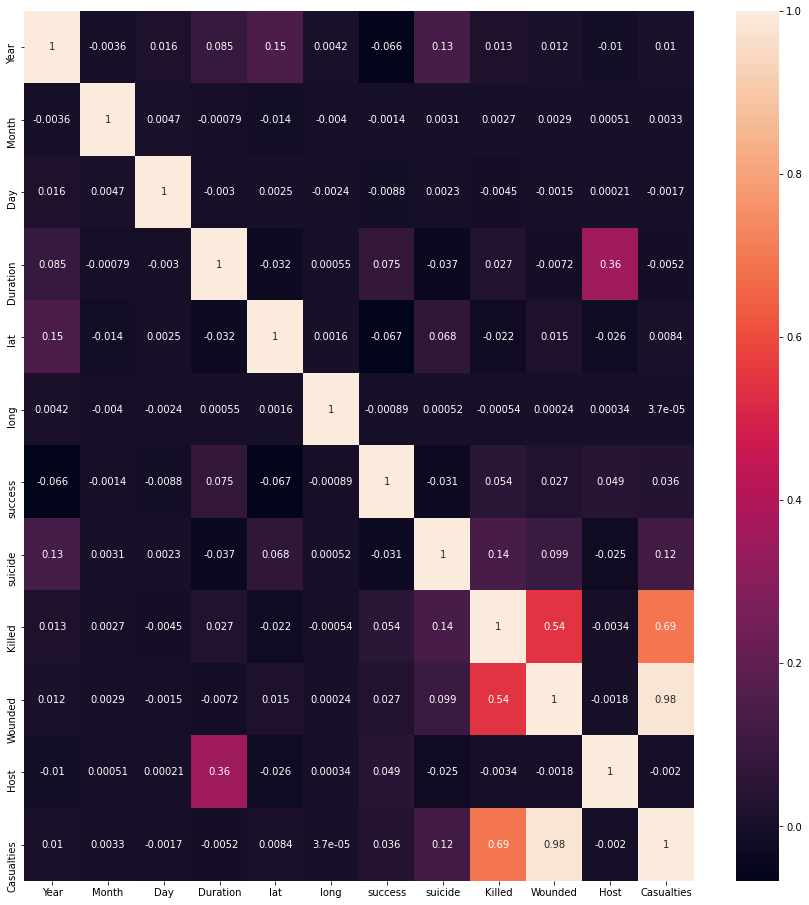

In [28]:
fig,axes = plt.subplots(1,1,figsize=(15,16))
sns.heatmap(df.corr(), annot =True)
plt.show()

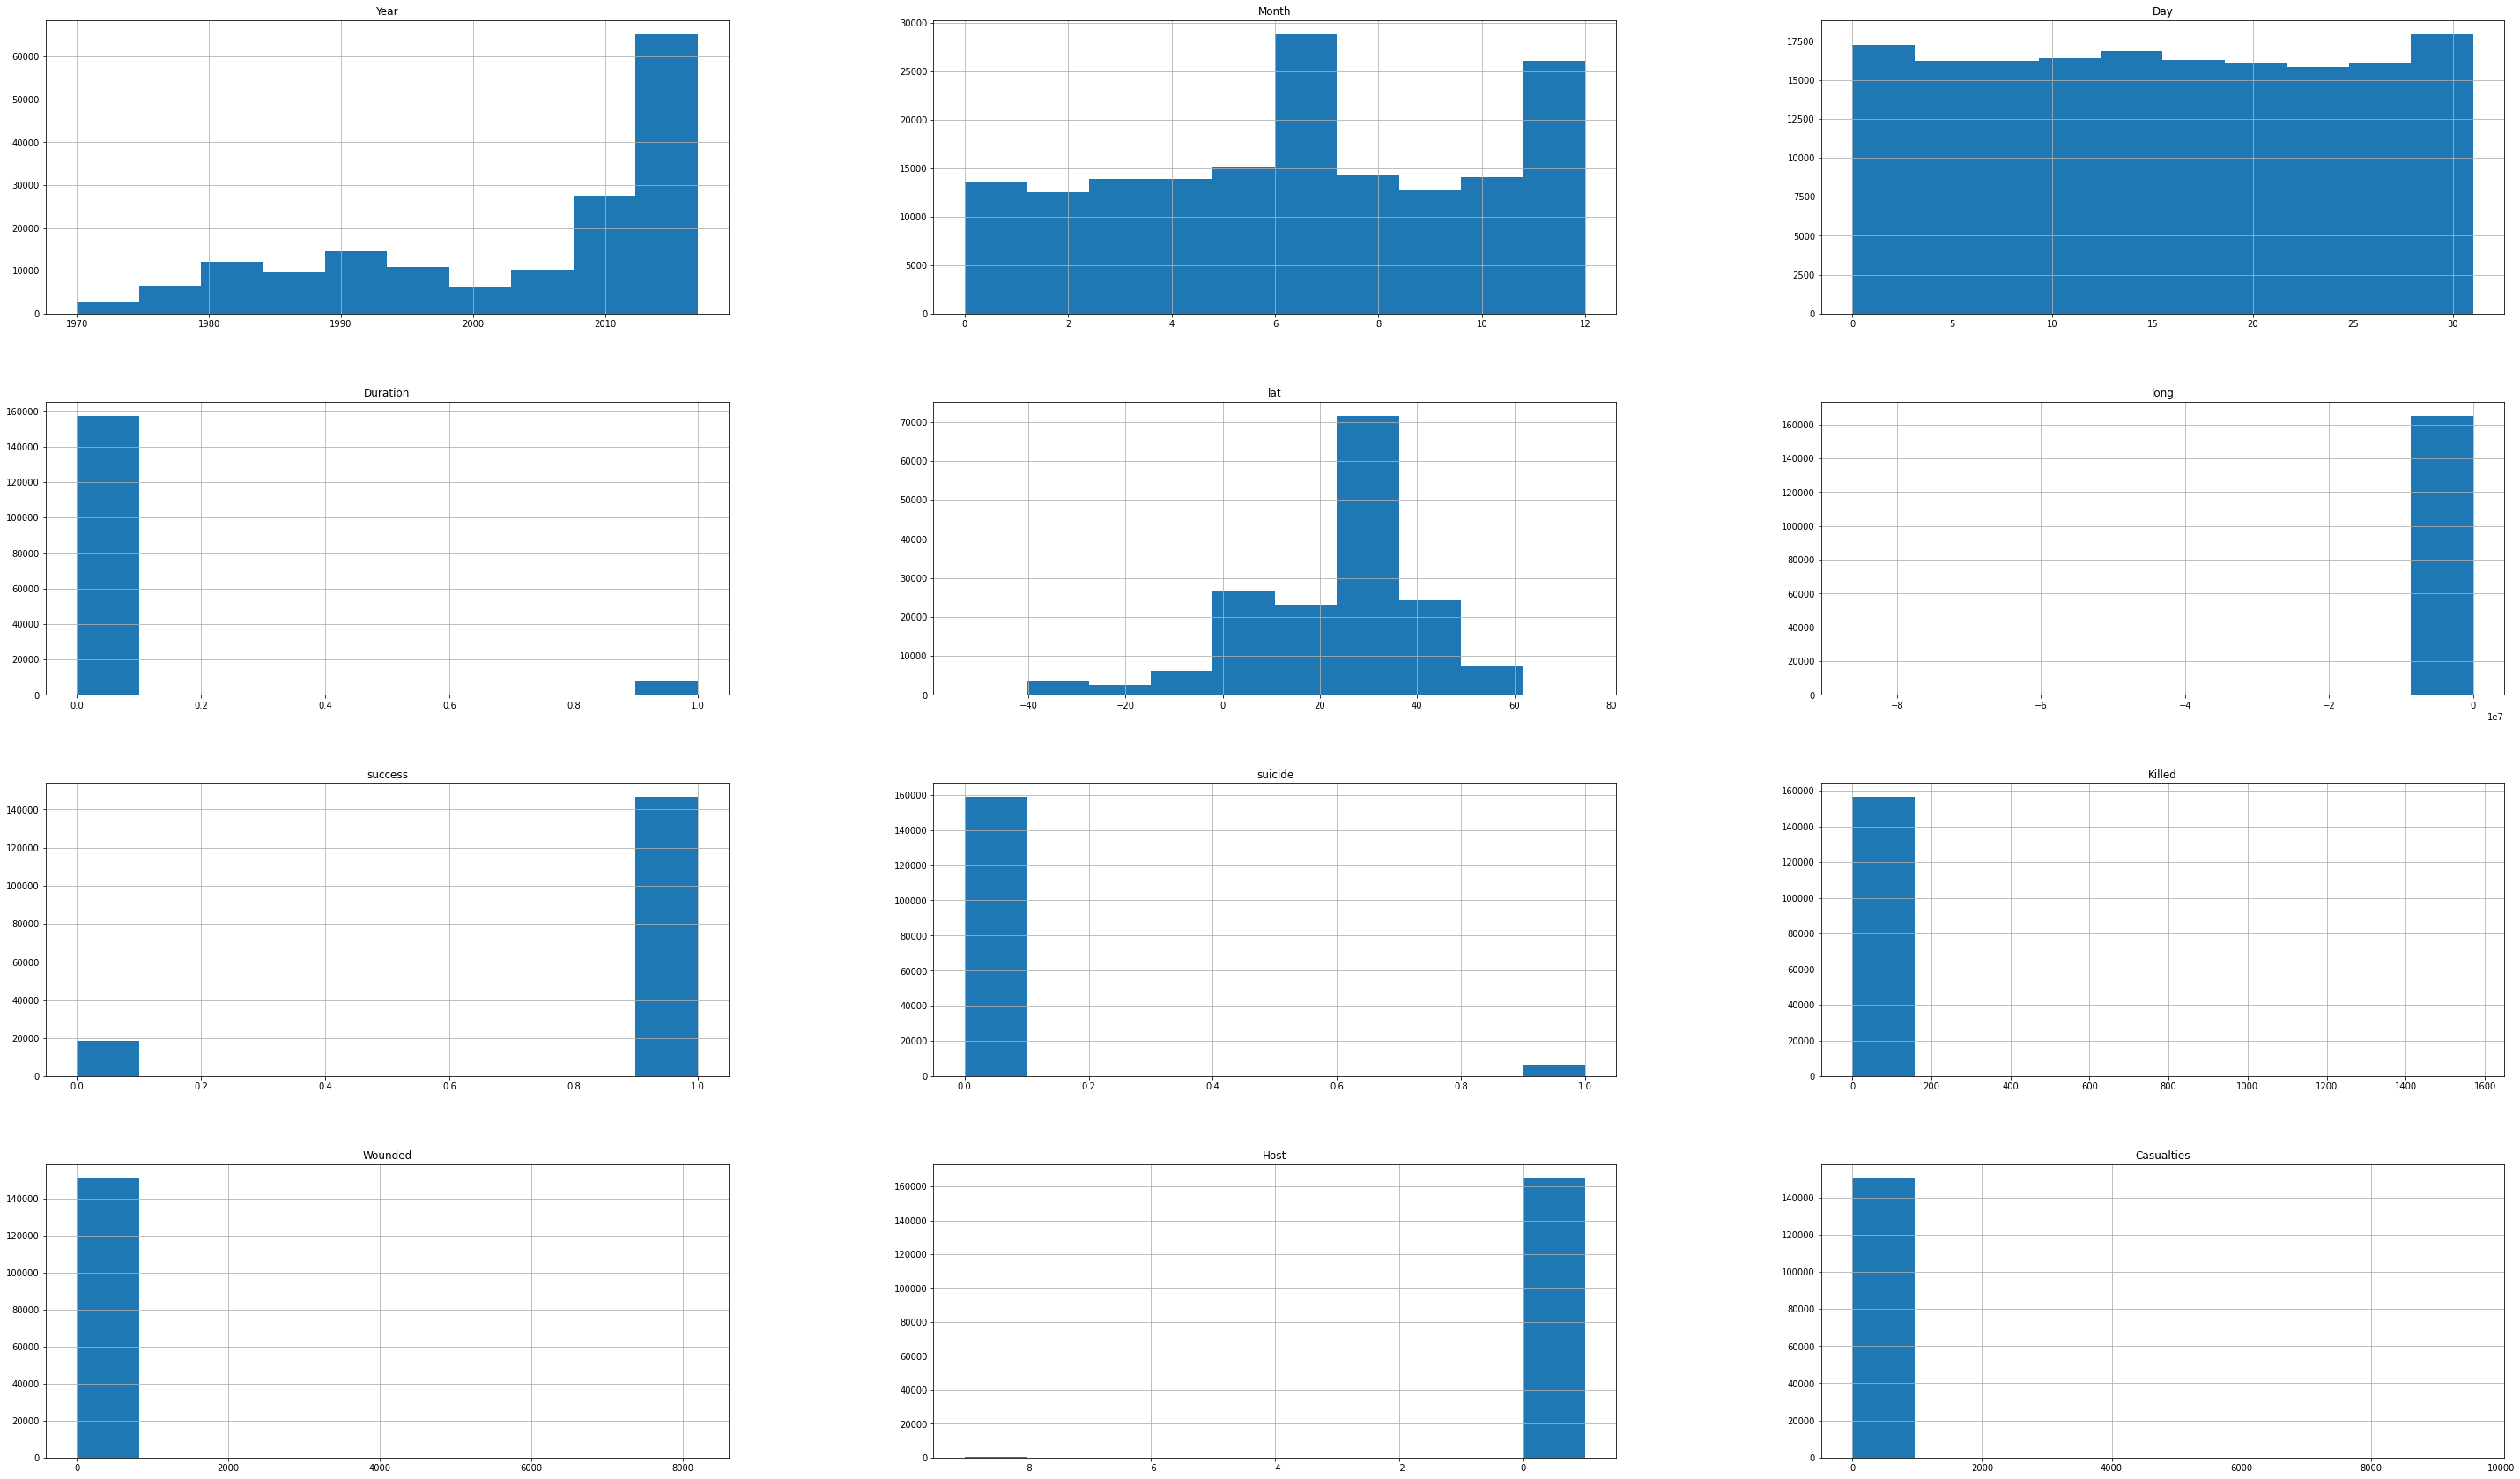

In [29]:
# Using histogram to represent realtionship between variables.
df.hist(figsize=(50,30))
plt.show()

**Countries affected by terrorist attacks**

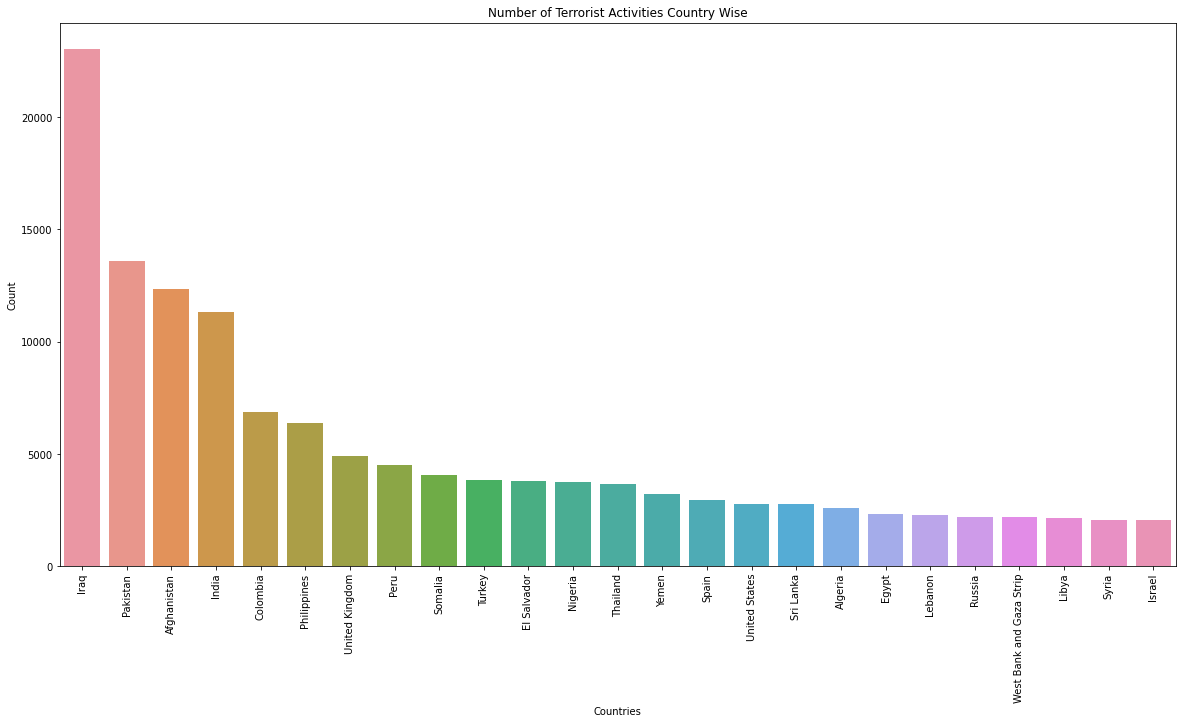

In [30]:
plt.figure(figsize =(20,10))
sns.barplot(x=df['Country'].value_counts()[:25].index,y =df['Country'].value_counts()[:25].values)
plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title("Number of Terrorist Activities Country Wise")
plt.show()

**Terrorist Attack by Region Wise**

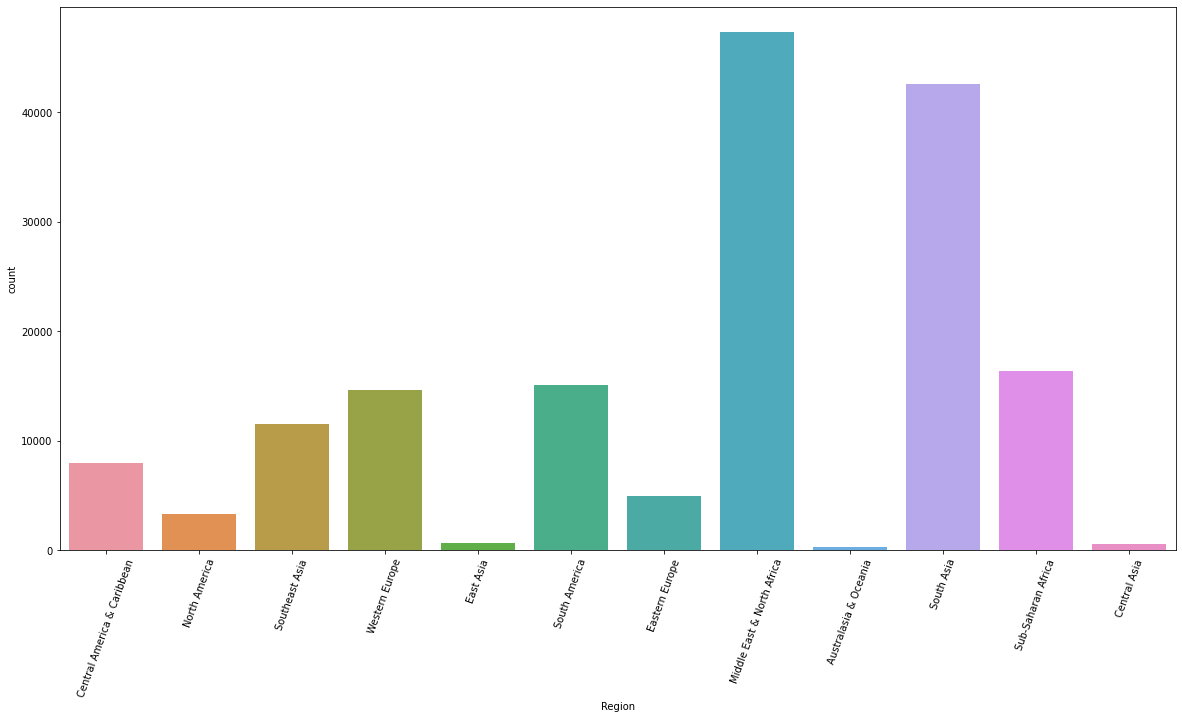

In [31]:
df['Region'].value_counts()
plt.figure(figsize=(20,10))
sns.countplot(x="Region", data=df)
plt.xticks(rotation=70)
plt.show()

In [32]:
print("Country With Highest Terrorist Attacks:", df['Country'].value_counts().index[0])
print("Region With Highest Terrorist Attacks:", df['Region'].value_counts().index[0])
print("Most Casaulties in an Attack were:", df['Casualties'].max()," , Which took place in the Country",df.loc[df['Casualties'].idxmax()].Country)

Country With Highest Terrorist Attacks: Iraq
Region With Highest Terrorist Attacks: Middle East & North Africa
Most Casaulties in an Attack were: 9574.0  , Which took place in the Country United States


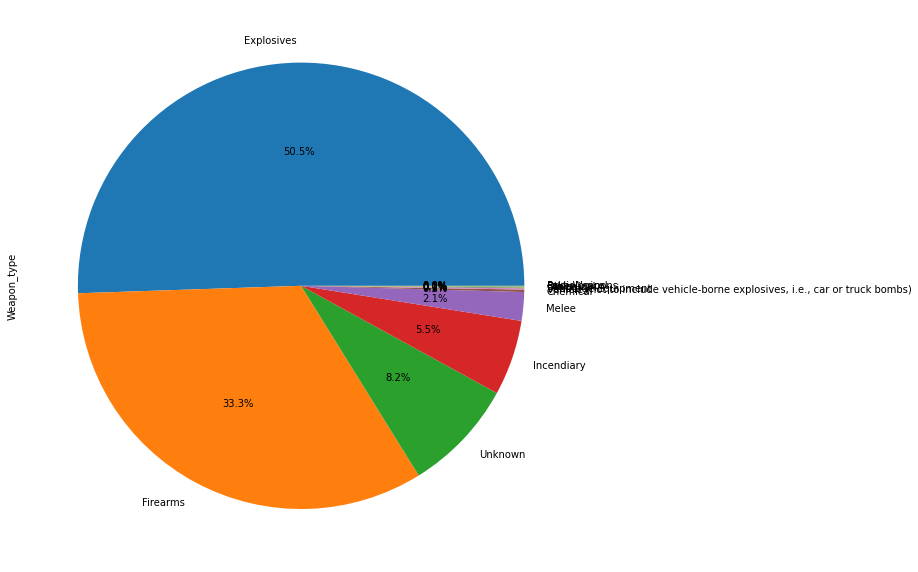

In [33]:
# Weapon types used with the help of pie chart
plt.figure(figsize=(10,15))
df['Weapon_type'].value_counts().plot.pie(autopct ="%1.1f%%")
plt.show()

**Number of Terriorst Attacks Each Year**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



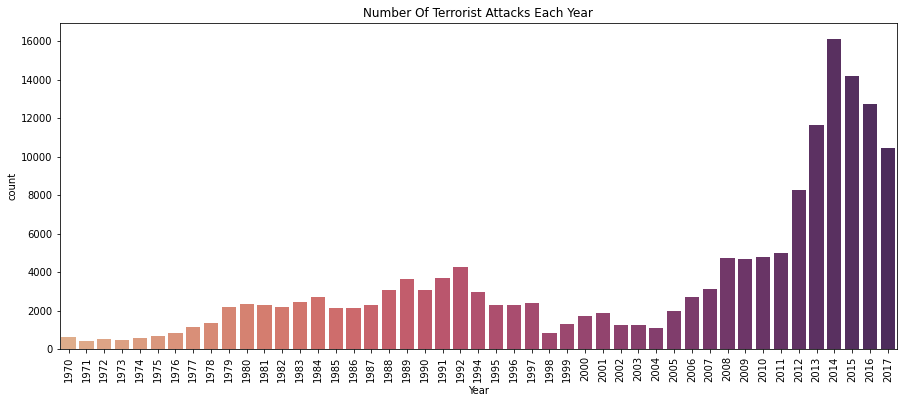

In [34]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=df,palette='flare')
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Attacks Each Year')
plt.show()

There was unexpected increase in Attacks after the year 1978. Then there was a Decrease between the period 1998-2004. Then after 2004 the Terrorist Activities Increased Sharply.

**Number of Casualties Each Year**

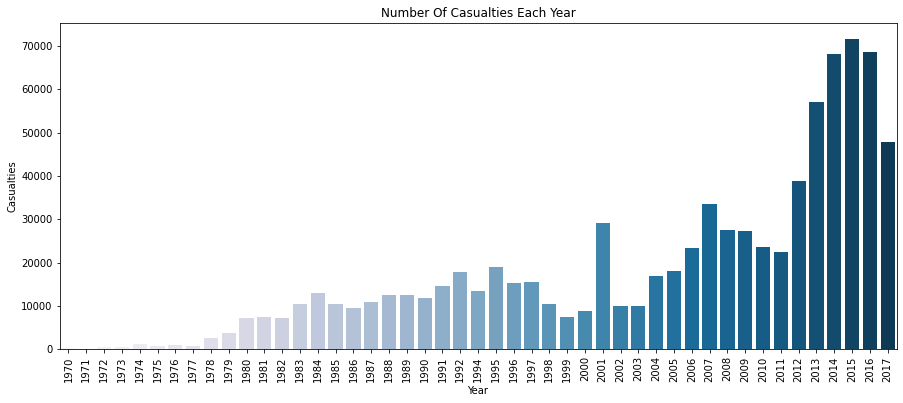

In [35]:
plt.subplots(figsize=(15,6))
year_cas = df.groupby('Year').Casualties.sum().to_frame().reset_index()
year_cas.columns = ['Year','Casualties']
sns.barplot(x=year_cas.Year, y=year_cas.Casualties, palette='PuBu')
plt.xticks(rotation=90)
plt.title('Number Of Casualties Each Year')
plt.show()

**Attacks Categorized By  Successful and Unsuccessful**

Text(0.5, 1.0, 'Successful and Unsuccessful Attacks')

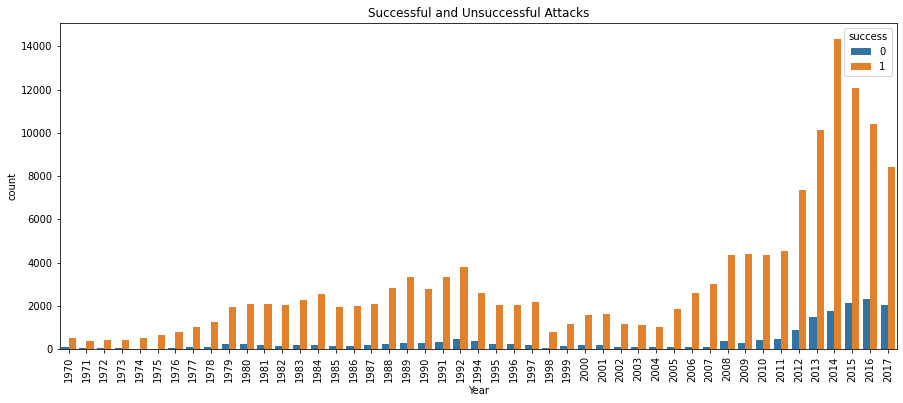

In [36]:
plt.subplots(figsize=(15,6))
sns.countplot(x='Year', hue='success', data=df)
plt.xticks(rotation=90)
plt.title('Successful and Unsuccessful Attacks')

As you notice here there is a huge difference between the success and not being a success.

**Terrorism By Top 15 Affected Countries**

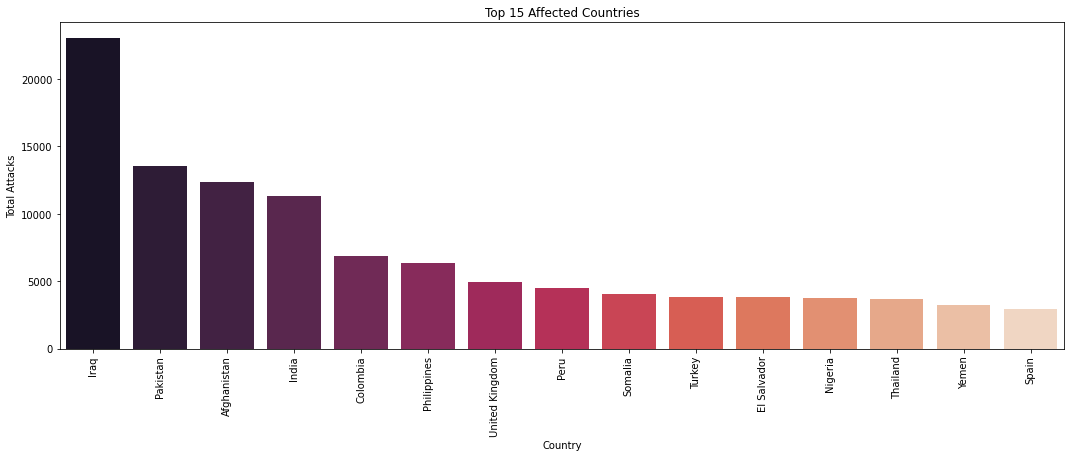

In [37]:
plt.subplots(figsize=(18,6))
country_attacks = df.Country.value_counts()[:15].reset_index()
country_attacks.columns = ['Country', 'Total Attacks']
sns.barplot(x=country_attacks.Country, y=country_attacks['Total Attacks'], palette= 'rocket')
plt.xticks(rotation=90)
plt.title('Top 15 Affected Countries')
plt.show()

**Terrorism  Affected Cities**

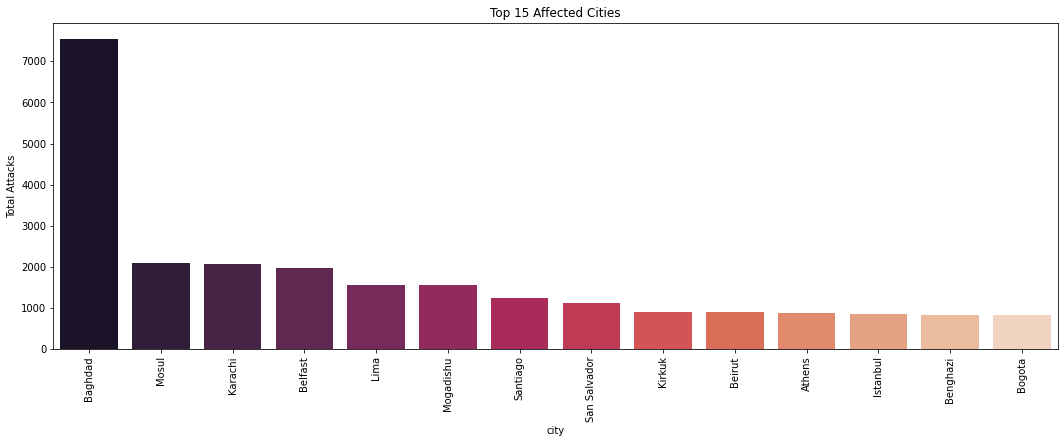

In [38]:
plt.subplots(figsize=(18,6))
city_attacks = df.city.value_counts()[:15].drop('Unknown').reset_index()
city_attacks.columns = ['city', 'Total Attacks']
sns.barplot(x=city_attacks.city, y=city_attacks['Total Attacks'], palette= 'rocket')
plt.xticks(rotation=90)
plt.title('Top 15 Affected Cities')
plt.show()

**Baghdad, Karachi, Lima, Mosul, and Belfast are the top five most affected cities.**

# **Number of Total Attacks and Casualties By Region**

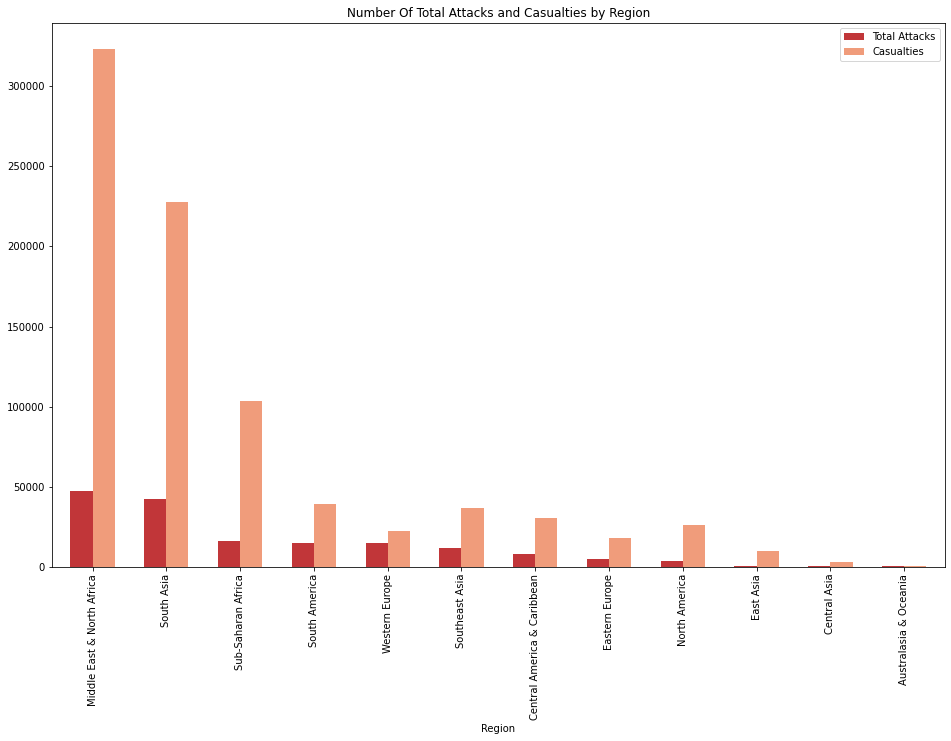

In [39]:
region_attacks = df.Region.value_counts().to_frame().reset_index()
region_attacks.columns = ['Region', 'Total Attacks']
region_cas = df.groupby('Region').Casualties.sum().to_frame().reset_index()
region_cas.columns = ['Region', 'Casualties']
# city_cas.drop('Unknown', axis=0, inplace=True)
region_tot = pd.merge(region_attacks, region_cas, how='left', on='Region').sort_values('Total Attacks', ascending=False)
# fig = plt.figure()
# fig.subplots()
sns.set_palette('RdBu')
region_tot.plot.bar(x='Region', width=0.6)
plt.xticks(rotation=90)
plt.title('Number Of Total Attacks and Casualties by Region')
fig = plt.gcf()
fig.set_size_inches(16,10)
plt.show()

If you notice the graph, total attacks and casualties by region, the Middle East and North Africa had the most attacks and casualties.

# **Attack Type vs Region**

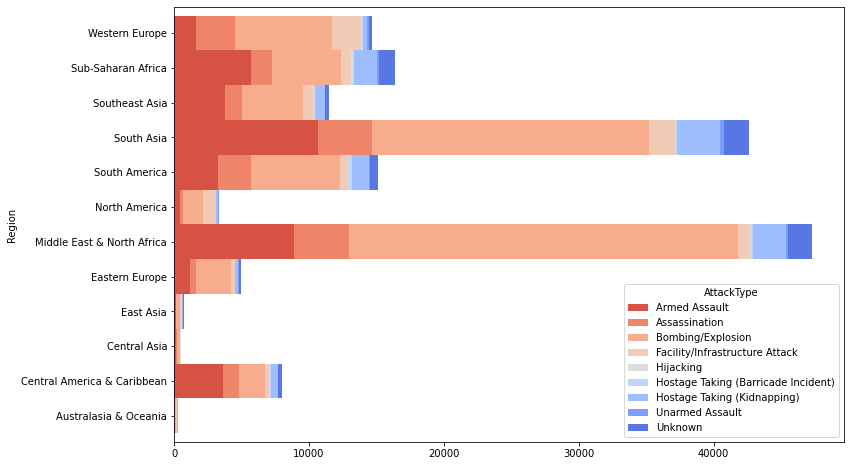

In [40]:
pd.crosstab(df.Region,df.AttackType).plot.barh(stacked=True,width=1,color=sns.color_palette('coolwarm_r',9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

Based on the Attack type and region graph, we can understand that the most commonly  attack type being used by all regions is bombing/explosion.

# **Most Dangerous Organizations**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



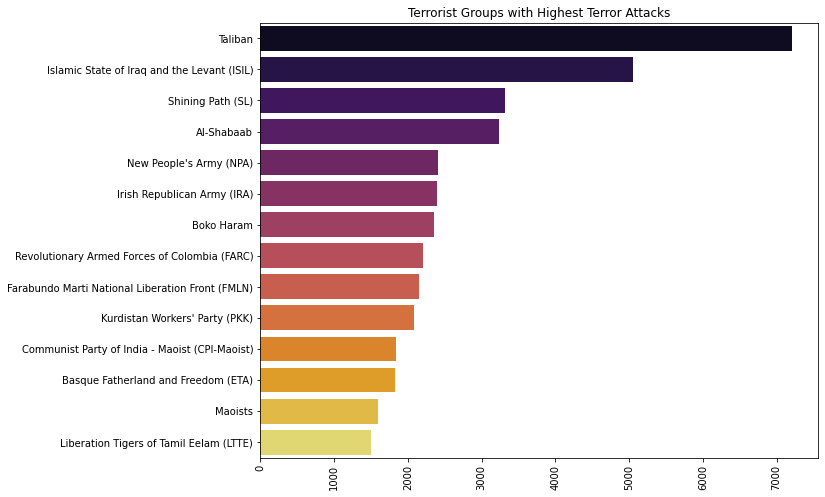

In [41]:
sns.barplot(df['Group'].value_counts()[1:15].values,df['Group'].value_counts()[1:15].index,palette=('inferno'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

In the above graph of the terrorist group , the top three most dangerous organisations are the Taliban, the Islamic State of Iraq and the Levant (ISIL), and the Shining Path (SL)

Conclusion :

Countries with the highest number of Terrorist Attacks: Iraq

Region which is most attacked:Middle East & North Africa

There was a growth in terrorist attack from 1977 to 1981

Bombing/Explosions is the most common type of attack

 Most targeted are private citizens are the preferred target of terrorists, with military property ranking in second.

 Most type of weapon used is explosives.

 Bellfast and Salvador are the most attacked cities
 
 Most number of terriost attack were done by an unknown group
 
Highest number of frequencies of attacks in which year : 2014 

# **THANK YOU !**